In [4]:
import pandas as pd
df_json = pd.read_json('dim_customer.json')
df_json

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [5]:
df_csv= pd.read_csv('fct_invoice.csv')
df_csv

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


[EASY] 1. How many unique customers are in the dataset?

In [6]:
unique_customer = df_csv['customer_id'].unique()
print(len(unique_customer))

5191


[EASY] 2. What are the different categories of products available? How many unique categories are there?

In [7]:
different_categories = df_csv["category"].unique()
print(different_categories)
print(len(different_categories))

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


[EASY] 3. Which payment method is the most popular? How many times was it used?

In [8]:
payment_type = df_csv['payment_method']
list_of_payment_type=list(payment_type)
credit_card=0
debit_card=0
cash=0
for i in list_of_payment_type:
    if i == "Credit Card":
        credit_card += 1
    if i == "Debit Card":
        debit_card += 1
    if i == "Cash":
        cash += 1

if cash>credit_card and cash>debit_card:
    print("Cash " + str(cash))
if debit_card>credit_card and debit_card>cash:
    print ("Debit Card " + str(debit_card))
if credit_card>debit_card and credit_card>cash:
    print("Credit Card " + str(credit_card))

Cash 44447


[MEDIUM] 1. What are the three most popular categories, by total sales?

In [60]:
categories = df_csv["category"].unique()
list(categories)

total_revenue = df_csv['quantity'] * df['price']
df_csv['total_revenue'] = total_revenue
category_sales = df_csv.groupby('category')['total_revenue'].sum()
top_3_categories = category_sales.nlargest(3)
top_3_categories

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_revenue, dtype: float64

[MEDIUM] 2. What are the total sales attributed to customers over the age of 45?

In [25]:
total_sales = pd.merge(df_csv,df_json,left_on="customer_id", right_on="id")
total_sales

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_revenue,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,8386,Perez


In [31]:
over_45_sales = total_sales[total_sales['age']>45]

In [32]:
over_45_sales['total_revenue'].sum()

82039768.15

[MEDIUM] 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

/var/folders/ff/sy2gv5j92ddf7jyq_xv8j7980000gn/T/ipykernel_54819/2797792301.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = df_csv.groupby(['year_month']).sum()['total_revenue']


Text(0.5, 1.0, 'Total Sales')

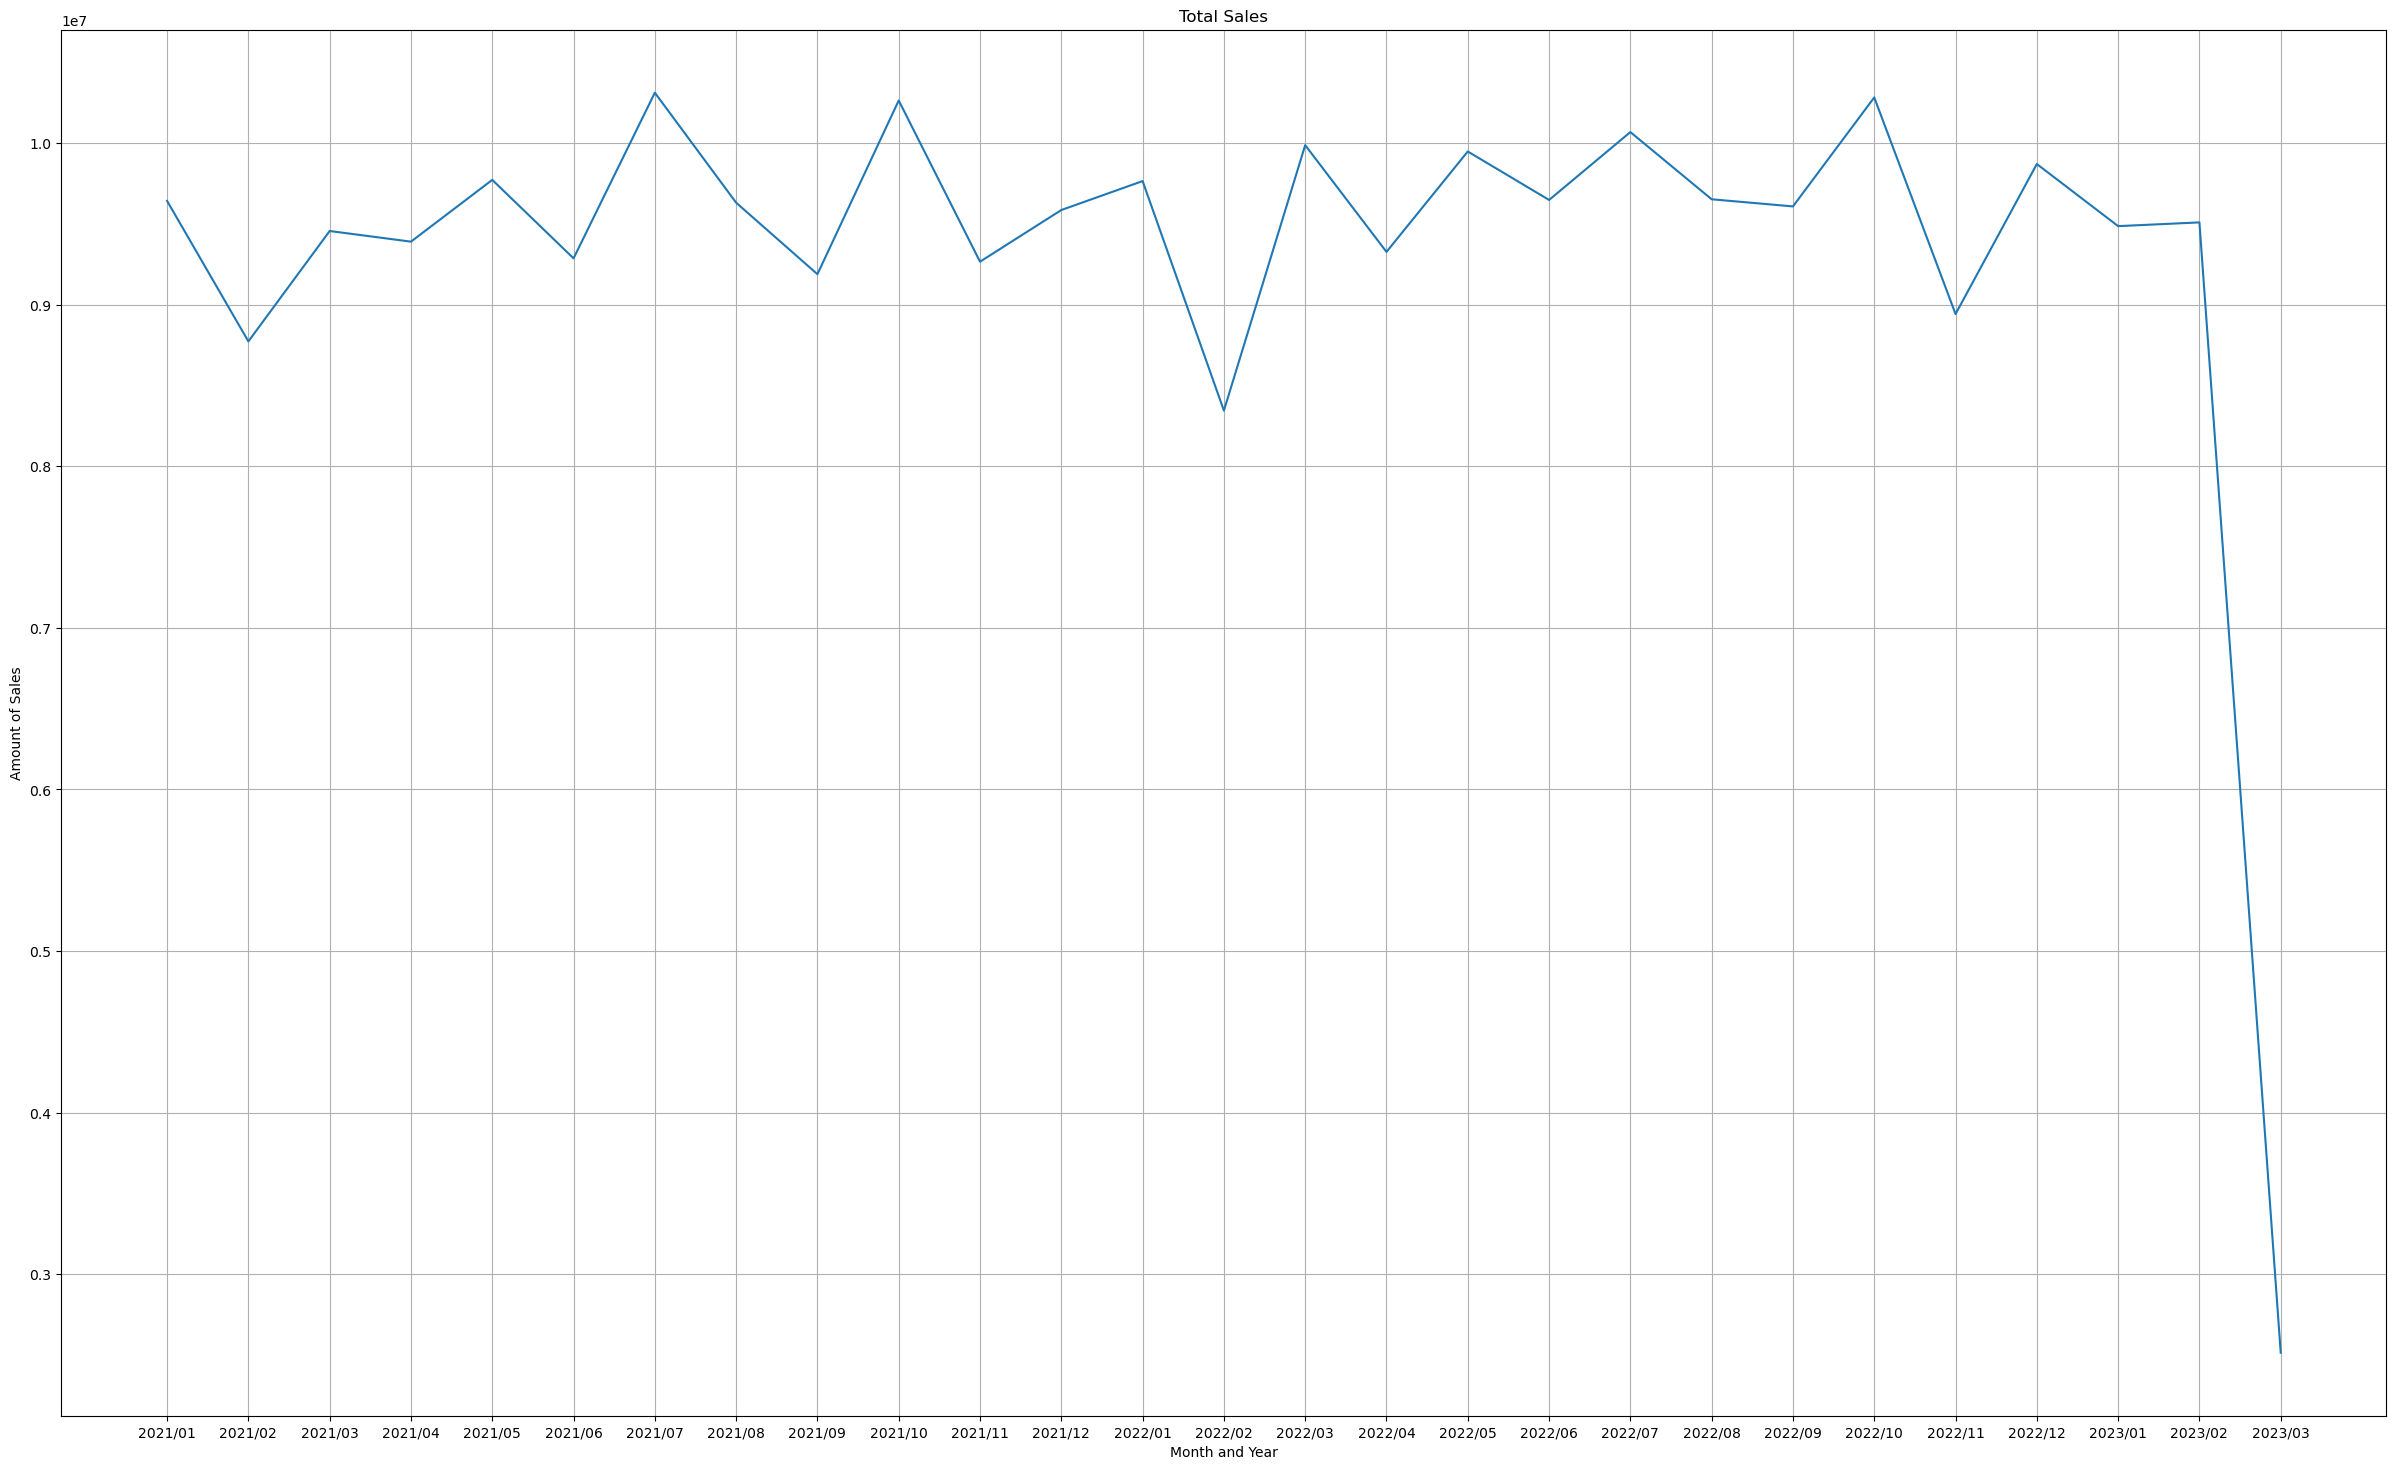

In [57]:
import matplotlib.pyplot as plt
from datetime import date

df_csv['invoice_date'] = pd.to_datetime(df_csv['invoice_date'], format='%d/%m/%Y')
df_csv['year_month'] = df_csv['invoice_date'].dt.strftime('%Y/%m')

x = df_csv.groupby(['year_month'])
y = df_csv.groupby(['year_month']).sum()['total_revenue']
x_values = x.groups.keys()
y_values = y.values

plt.figure(figsize=(30, 18))
plt.plot(x_values,y_values)
plt.grid()
plt.xlabel('Month and Year')
plt.ylabel('Amount of Sales')
plt.title('Total Sales')

[HARD] 1. Create a table similar to a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [59]:
age_range = pd.cut(total_sales['age'], bins = [9, 19, 29, 39, 49, 59, 69, 79, 89], labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89'])
pivot_table = total_sales.pivot_table(values = 'total_revenue', index = 'category', columns = age_range, aggfunc = sum)

pivot_table


age,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
